In [27]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False
IS_COLAB_ENV

True

In [0]:
%tensorflow_version 2.x

**Predict Category of the Image**

The image classification task simply answers the question “Does the image contain X” where X can be a lion, tiger or any other category/class of objects. In this file, we see the code for predicting categories for an image.

We start off by importing all the necessary modules from Keras and Python packages. Numpy here gives us the ability to transform matrices, while Matplotlib is graph plotting library that also allows us to display images.


*We will use the ResNet-50 Architecture which comes with the Keras Framework itself.*

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Once we have imported our libraries, we will load and display our test image in a 224x224 resolution.

In [30]:
image_path = "../../sample_images/who_am_I.jpg"
if IS_COLAB_ENV:
  !curl https://raw.githubusercontent.com/Ankur2099/Practical-Deep-Learning-2020/master/sample_images/who_am_I.jpg --output who_am_I.jpg
  image_path = 'who_am_I.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1030k  100 1030k    0     0  10.5M      0 --:--:-- --:--:-- --:--:-- 10.7M


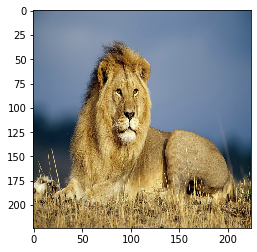

In [31]:
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [0]:
model = tf.keras.applications.resnet50.ResNet50()

Our model *ResNet-50* which as the name suggests contains 50 hidden layers has already been trained on *ImageNet Dataset*  only to accept a batch of images. expand_dims adds an extra dimension to the array, thereby creating an array of arrays (or a batch of one image).

Let's write the entire code in one function now so we can use it to make predictions.

In [0]:
def classify(image_path):
  img = image.load_img(image_path, target_size=(224, 224))
  model = tf.keras.applications.resnet50.ResNet50()
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)    #we create a batch of single image i.e. (1 x 224 x 224 x 3),  3 is our RGB and Do our Normalizattion
  img_preprocessed = preprocess_input(img_batch)

  prediction = model.predict(img_preprocessed)

  print(decode_predictions(prediction, top=3)[0])   #decode_prediction  function in Keras tells us the probability of each category of oject contained in image


*Now let's try to predict our image class*

In [34]:
classify('who_am_I.jpg')

[('n02129165', 'lion', 0.99003184), ('n02130308', 'cheetah', 0.0051646666), ('n02415577', 'bighorn', 0.0024578988)]


Our Classifier is 99% sure that its a Lion